# Plot RMSD per mutant and conformation

In [ ]:
import os
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_folder = "data/md_traj_analysis/"

In [ ]:
clean_line = lambda line: list(map(float, line.strip().split()))
exclude_regex = lambda line: not re.search("#|@",line)

In [ ]:
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

for mutant in mutant_names:
    ax = Axes[mutant]
    for g in Conformations[mutant]: 
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsd_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)

            ax.plot(*data.T, color=Colors[g], lw=0.25, alpha=0.5)

    ax.set_title(mutant)
    ax.set_xlabel("time (ps)", fontsize=10)
    ax.set_ylabel("$C_\\alpha$-RMSD", fontsize=10)

    ax.set_xlim(0, 100000)

fig.tight_layout()
plt.show()

# RMSD distributions: Last 10ns MD

In [ ]:
data_folder = "data/md_traj_analysis/"

In [ ]:
clean_line = lambda line: list(map(float, line.strip().split()))
exclude_regex = lambda line: not re.search("#|@",line)

In [ ]:
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

## Distribution from RMSD trajectory data

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(7,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

time_threshold_ps = 90000 # picoseconds

for mutant in mutant_names:
    ax = Axes[mutant]
    
    for g in Conformations[mutant]:
        
        data_last_10ns = []
        
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsd_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)
            
            time, value = data.T
            data_last_10ns = data_last_10ns + list(data[time > time_threshold_ps].T[-1])

        sns.histplot(data=data_last_10ns, stat="density", kde=True, color=Colors[g], alpha=0.25, ax=ax)

    ax.set_title(mutant)
    ax.set_xlabel("$C_\\alpha$-RMSD", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

fig.tight_layout()
plt.show()

## Distribution from mean RMSD trajectory data

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(7,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

time_threshold = 90000 # picosecs

for mutant in mutant_names:
    ax = Axes[mutant]
    
    for g in Conformations[mutant]:
        
        data_last_10ns = []
        
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsd_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)
            
            time, value = data.T
            if len(data[time > 90000].T[-1]) > 0:
                data_last_10ns.append( np.mean(data[time > time_threshold].T[-1]) )
        
        sns.histplot(data=data_last_10ns, stat="density", color=Colors[g], alpha=0.25, ax=ax)

    ax.set_title(mutant)
    ax.set_xlabel("$C_\\alpha$-RMSD", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

fig.tight_layout()
plt.show()

## Rank models: Low-to-High Mean-RMSD (90-100ns)

In [ ]:
TOP_LOWEST_RMSD_MODELS = {
    'cWza': {0:[], 1:[]},
    'cWza-K375C': {0:[], 1:[]},
    'cWza-S355C': {0:[], 1:[]},
    'cWza-Y373C': {1:[]}    
}

In [ ]:
N_models = 10

In [ ]:
Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

datafile_suffix = '_md_100ns_rmsd_C-alpha.xvg'

time_threshold = 90000 # pico-secs
for mutant in mutant_names:
    TOP_LOWEST_RMSD_MODELS[mutant] = {}
    
    for group in Conformations[mutant]:
        data_output = []
        
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(group)+'_*'+datafile_suffix)
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)
            
            time, value = data.T
            rmsd_data = data[time > time_threshold].T[-1]
            model_labels = path.split('/')[-1].split(datafile_suffix)[0]
            
            if len(rmsd_data) > 0: # check for empty dataset
                data_output.append([np.mean(rmsd_data), model_labels])
        
        #sort data by RMSD (low to high)        
        TOP_LOWEST_RMSD_MODELS[mutant][group] = sorted(data_output, key=lambda x: x[0])[:N_models]

Print out data

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option('display.colheader_justify', 'center')

In [ ]:
model_lowest_rmsd = []
for mutant in mutant_names:
    for group in Conformations[mutant]:
        for item in TOP_LOWEST_RMSD_MODELS[mutant][group]:
            model_lowest_rmsd.append(item)
            
df = pd.DataFrame(model_lowest_rmsd, columns=['Mean RMSD (90-100ns)[nm]', 'Model tags'])
df.style.set_properties(**{'text-align': 'center'})

### Plot RMSD data

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

datafile_suffix = '_md_100ns_rmsd_C-alpha.xvg'

for mutant in mutant_names:
    ax = Axes[mutant]
    
    for group in Conformations[mutant]:
        data_models = TOP_LOWEST_RMSD_MODELS[mutant][group]
        
        for i in range(len(data_models)):
            model_tags = data_models[i][-1]
            path = data_folder+model_tags+datafile_suffix
        
            rmsd_data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            rmsd_data = np.array(rmsd_data)
            
            ax.plot(*rmsd_data.T, color=Colors[group], lw=0.25, alpha=0.5)

    ax.set_title(mutant)
    ax.set_xlabel("time (ps)", fontsize=10)
    ax.set_ylabel("$C_\\alpha$-RMSD", fontsize=10)

     
ax.set_xlim(0, 100000)
ax.set_ylim(0, 0.7)

suptitle = "Top "+str(N_models)+" lowest-RMSD models"
fig.suptitle(suptitle)

fig.tight_layout()
plt.show()

# HOLE Analysis

## Pull trajectory files from cloud

### First remote location

In [ ]:
import os

In [ ]:
command1 = "rclone lsd mydrive:Career/Previous\ jobs/PhD\ Research/cWzaModelling/md_100ns"
command2 = "rclone lsf mydrive:Career/Previous\ jobs/PhD\ Research/cWzaModelling/md_100ns"
command3 = "rclone copyto mydrive:Career/Previous\ jobs/PhD\ Research/cWzaModelling/md_100ns"

models_missing = []
for model_name in df['Model tags']:
    mutant, conformation = model_name.split('_')[:2]
    model_selected = model_name.split('_'.join([mutant, conformation]))[-1].lstrip('_')
    
    model_remote = !$command1/$"{mutant}"/$"{conformation}"/$"{model_selected}"
    if not any(['ERROR' in x for x in model_remote]):
        model_remote_files = !$command2/$"{mutant}"/$"{conformation}"/$"{model_selected}"
        print(mutant, conformation, model_selected, model_remote_files)
        if set(['md_100ns.tpr', 'md_100ns.xtc']).issubset(model_remote_files):
            model_number = model_selected.split('_')[3]
            model_local_dir = os.path.join('data/' ,'_'.join([mutant, conformation, model_number]))
            if os.path.isdir(model_local_dir):
                print("INFO: Dir already exists: ", model_local_dir)
            else:
                print("INFO: I'll create a new dir for: ", model_local_dir)
                os.mkdir(model_local_dir)
            !$command3/$"{mutant}"/$"{conformation}"/$"{model_selected}" $"{model_local_dir}"
    else:
        print("ERROR: Couldn't find folder for ", model_name)
        models_missing.append(model_name)

### Second remote location

Deal with missing models

In [ ]:
command1 = "rclone lsd mydrive:Career/Previous\ jobs/PhD\ Research/cWzaModelling/bcp4-backup"
command2 = "rclone lsf mydrive:Career/Previous\ jobs/PhD\ Research/cWzaModelling/bcp4-backup"
command3 = "rclone copyto mydrive:Career/Previous\ jobs/PhD\ Research/cWzaModelling/bcp4-backup"

models_missing2 = []
for model_name in models_missing:
    mutant, conformation = model_name.split('_')[:2]
    model_selected = model_name.split('_'.join([mutant, conformation]))[-1].lstrip('_')
    
    model_remote = !$command1/$"{mutant}"/$"{conformation}"/$"{model_selected}"
    if not any(['ERROR' in x for x in model_remote]):
        model_remote_files = !$command2/$"{mutant}"/$"{conformation}"/$"{model_selected}"
        print(mutant, conformation, model_selected, model_remote_files)
        if set(['md_100ns.tpr', 'md_100ns.xtc']).issubset(model_remote_files):
            model_number = model_selected.split('_')[3]
            model_local_dir = os.path.join('data/' ,'_'.join([mutant, conformation, model_number]))
            if os.path.isdir(model_local_dir):
                print("INFO: Dir already exists: ", model_local_dir)
            else:
                print("INFO: I'll create a new dir for: ", model_local_dir)
                os.mkdir(model_local_dir)
            !$command3/$"{mutant}"/$"{conformation}"/$"{model_selected}" $"{model_local_dir}"
    else:
        print("ERROR: Couldn't find folder for ", model_name)
        models_missing2.append(model_name)

In [ ]:
len(models_missing2)

## Perform Analysis

### Master script

Conent of 

```bash
# extract_frames_and_analyse_conductance.sh
n_cores=6
for dir in `ls -d data/cWza*_conformation[0,1]_[0-9][0-9][0-9][0-9]`; do
	python extract_frames_parallel.py $dir $n_cores;
	ls ${dir}/frames/frame*.pdb | python run_hole_parallel.py $n_cores;
	rm -rf ${dir}/frames/frame*.pdb;
done
```

Execution

```bash
nohup bash extract_frames_and_analyse_conductance.sh & > nohup.out
```

In [ ]:
import os
import mdtraj as md

In [ ]:
dirname = 'data/cWza-Y373C_conformation1_0209/'

traj_file = os.path.join(dirname, 'md_100ns.xtc')
top_file = os.path.join(dirname, 'md_100ns.gro')
trajectory = md.load(traj_file, top=top_file)
protein_indices = trajectory.topology.select("protein")

In [ ]:
framesdir = os.path.join(dirname, 'frames')
if os.path.isdir(framesdir):
    pass
    print("INFO: Dir exists")
else:
    os.mkdir(framesdir)

Serial implementation

In [ ]:
for i in range(trajectory.n_frames):
    frame = trajectory[i]
    protein_frame = frame.restrict_atoms(atom_indices=protein_indices)
    pdb_output = os.path.join(framesdir, 'frame'+str(i)+'.pdb')
    protein_frame.save_pdb(filename=pdb_output)

In [ ]:
def extract_protein_frame(i, trajectory, protein_indices, outdir):
    frame = trajectory[i]
    protein_frame = frame.restrict_atoms(atom_indices=protein_indices)
    pdb_output = os.path.join(outdir, 'frame'+f'{i:04d}'+'.pdb')
    protein_frame.save_pdb(filename=pdb_output)
    
f = lambda i:extract_protein_frame(i, trajectory, protein_indices, framesdir)

In [ ]:
from joblib import Parallel, delayed

In [ ]:
p = Parallel(n_jobs=8)(delayed(f)(i) for i in range(trajectory.n_frames))

### `extract_frames_parallel.py`

In [ ]:
%%writefile extract_frames_parallel.py
import os
import sys
import numpy as np
import mdtraj as md
from time import process_time
from joblib import Parallel, delayed

# Example:
# python extract_frames_parallel.py data/cWza-Y373C_conformation1_0209/ 8

dirname = sys.argv[1]
n_cores = int(sys.argv[2])

tic = process_time()
traj_file = os.path.join(dirname, 'md_100ns.xtc')
top_file = os.path.join(dirname, 'md_100ns.gro')
trajectory = md.load(traj_file, top=top_file)
protein_indices = trajectory.topology.select("protein")

framesdir = os.path.join(dirname, 'frames')
if os.path.isdir(framesdir):
    pass
    print("INFO: Dir 'frames' exists.")
else:
    os.mkdir(framesdir)
    print("INFO: Created 'frames' dir.")

def extract_protein_frame(i, trajectory, protein_indices, outdir):
    frame = trajectory[i]
    protein_frame = frame.restrict_atoms(atom_indices=protein_indices)
    pdb_output = os.path.join(outdir, 'frame'+f'{i:04d}'+'.pdb')
    protein_frame.save_pdb(filename=pdb_output)
    
print(f"INFO: Ypu have {trajectory.n_frames} frames in your trajectory: {dirname}")
f = lambda i:extract_protein_frame(i, trajectory, protein_indices, framesdir)
p = Parallel(n_jobs=n_cores)(delayed(f)(i) for i in range(trajectory.n_frames))

toc = process_time()
elapsed_time = np.round((toc-tic)/60, decimals=3)
print(f"INFO: Total elapsed time [m]: {elapsed_time}")

Use

```bash
for dir in `ls -d data/cWza*_conformation[0,1]_[0-9][0-9][0-9][0-9]`; do python extract_frames_parallel.py $dir 6; done
```

### `run_hole_parallel.py`

In [ ]:
%%writefile run_hole_parallel.py
import os
import re
import sys
import pickle
import numpy as np
import subprocess
from joblib import Parallel, delayed

def encode_hole_inputs(pdbfile):
    """
    This function creates ai simple HOLE input file
    """
    file_content = ("!HOLE input file",
                    f"coord {pdbfile}",
                    "radius ./hole2/rad/simple.rad",
                    "ignore hoh",
                    "capsule",
                    "endrad 15.")
    
    encoded_inputs = '\n'.join(file_content).encode("utf-8")
    
    return encoded_inputs

def run_hole(inputs_encoded):
    command = ['./hole2/exe/hole']
    process = subprocess.Popen(command, stdin=subprocess.PIPE, stdout = subprocess.PIPE)
    outputs_encoded = process.communicate(input=inputs_encoded)[0]
    
    return outputs_encoded
    
def process_hole_output(hole_output, key_name = 'pdbname'):
    """
    Compute HOLE conductance estimates and pore lumen dimensions/features
    NOTE: Had to wrap HOLE code in bash code 'run_hole' to automatically generate HOLE input file
    """
    try:
        for line in hole_output:
            if re.search(r'"Atomic" length of channel',line):
                pore_length = float(line.split()[4]) # [Angstroms]
            elif re.search(r'TAG',line):
                # All conductance estimates are in [nano-Siemens]
                x = line.split()
                VDW_Rmin = float(x[3]) # [Angstroms]
                Gmacro = 0.001*float(x[5])
                Gpred_Rmin = 0.001*float(x[8])
                Gpred_Lenght = 0.001*float(x[9])
                Gpred_AvgEPot = 0.001*float(x[10])

                HOLE_dimensions = (VDW_Rmin,pore_length)
                HOLE_conductance_estimates = (Gmacro,Gpred_Rmin,Gpred_Lenght,Gpred_AvgEPot)

                return {key_name:(HOLE_dimensions,HOLE_conductance_estimates)}
    except:
        
        HOLE_dimensions = (None,None)
        HOLE_conductance_estimates = (None,None,None,None)
        
        return {key_name:(HOLE_dimensions,HOLE_conductance_estimates)}

def extract_hole_results(pdb):
    inputs_encoded = encode_hole_inputs(pdb)
    outputs_encoded = run_hole(inputs_encoded)
    outputs_decoded = outputs_encoded.decode("utf-8").split('\n')
    
    key_name = os.path.basename(pdb).split('.')[0]
    outputs_dict = process_hole_output(outputs_decoded, key_name=key_name)
    
    return outputs_dict

if __name__ == "__main__":
    from time import process_time
    
    tic = process_time()
    
    pdbfiles = [x.strip() for x in sys.stdin.readlines()]
    n_cores = int(sys.argv[1])
    
    results = Parallel(n_jobs=n_cores)(delayed(extract_hole_results)(pdb) for pdb in pdbfiles)
    results_dict = {k: v for x in results for k, v in x.items()}
    
    pickle_file = os.path.join(os.path.dirname(pdbfiles[0]), "md_100ns.hole.pickle")
    with open(pickle_file, 'wb') as f:
        pickle.dump(results_dict, f)
    
    toc = process_time()
    elapsed_time = np.round((toc-tic)/60, decimals=3)
    print(f"INFO: Total elapsed time [m]: {elapsed_time}")

Use

```bash
dirname=data/cWza-Y373C_conformation1_0209
ls ${dirname}/frames/frame*.pdb | python run_hole_parallel.py 6
```

In [ ]:
import pickle
with open('data/cWza-Y373C_conformation1_0209/frames/md_100ns.hole.pickle','rb') as f:
    hole_data = pickle.load(f)

In [ ]:
hole_data['frame0000']

In [ ]:
%%writefile run_hole_parallel.py
import os
import re
import sys
import subprocess

def encode_hole_inputs(pdbfile):
    """
    This function creates ai simple HOLE input file
    """
    file_content = ("!HOLE input file",
                    f"coord {pdbfile}",
                    "radius ./hole2/rad/simple.rad",
                    "ignore hoh",
                    "capsule",
                    "endrad 15.")
    
    encoded_inputs = '\n'.join(file_content).encode("utf-8")
    
    return encoded_inputs

def run_hole(inputs_encoded):
    command = ['./hole2/exe/hole']
    process = subprocess.Popen(command, stdin=subprocess.PIPE, stdout = subprocess.PIPE)
    outputs_encoded = process.communicate(input=inputs_encoded)[0]
    
    return outputs_encoded
    
def process_hole_output(hole_output, key_name = 'pdbname'):
    """
    Compute HOLE conductance estimates and pore lumen dimensions/features
    NOTE: Had to wrap HOLE code in bash code 'run_hole' to automatically generate HOLE input file
    """
    for line in hole_output:
        if re.search(r'"Atomic" length of channel',line):
            pore_length = float(line.split()[4]) # [Angstroms]
        elif re.search(r'TAG',line):
            # All conductance estimates are in [nano-Siemens]
            x = line.split()
            VDW_Rmin = float(x[3]) # [Angstroms]
            Gmacro = 0.001*float(x[5])
            Gpred_Rmin = 0.001*float(x[8])
            Gpred_Lenght = 0.001*float(x[9])
            Gpred_AvgEPot = 0.001*float(x[10])

            HOLE_dimensions = (VDW_Rmin,pore_length)
            HOLE_conductance_estimates = (Gmacro,Gpred_Rmin,Gpred_Lenght,Gpred_AvgEPot)

            return {key_name:(HOLE_dimensions,HOLE_conductance_estimates)}

def extract_hole_results(pdbfile):
    inputs_encoded = encode_hole_inputs(pdbfile)
    outputs_encoded = run_hole(inputs_encoded)
    outputs_decoded = outputs_encoded.decode("utf-8").split('\n')
    
    key_name = os.path.basename(pdbfile).split('.')[0]
    outputs_dict = process_hole_output(outputs_decoded)[key_name]

if __name__ == "__main__":
    pdbfile= sys.argv[1]
    
    inputs_encoded = encode_hole_inputs(pdbfile)
    outputs_encoded = run_hole(inputs_encoded)
    outputs_decoded = outputs_encoded.decode("utf-8").split('\n')
    
    HOLE_dimensions, HOLE_conductance_estimates = process_hole_output(outputs_decoded)['pdbname']

    VDW_Rmin,pore_length = HOLE_dimensions    
    print("Filename: ", pdbfile)
    print('HOLE VDW_Rmin [Angstroms]: ', VDW_Rmin)
    print('HOLE Pore_Length [Angstroms]: ', pore_length)
    
    Gmacro,Gpred_Rmin,Gpred_Length,Gpred_AvgEPot = HOLE_conductance_estimates
    print('HOLE Gmacro [nS]: ', Gmacro)
    print('HOLE Gpred by Rmin [nS]: ', Gpred_Rmin)
    print('HOLE Gpred by Length [nS]: ', Gpred_Length)
    print('HOLE Gpred by Avg EPot [nS]: ', Gpred_AvgEPot)

### `md_conductance_analysis.py` (USELESS)

SCRIPT

In [ ]:
%%writefile md_conductance_analysis.py
import sys
import os
import coloredlogs, logging
import argparse
import numpy as np
from time import process_time
import MDAnalysis as mda
from MDAnalysis.analysis import hole2

# Initilise argparser
parser = argparse.ArgumentParser(description='This is a demo.')
parser.add_argument("-p",
                    "--topology",
                    dest="topology_filepath",
                    help="Set topology filepath")
parser.add_argument("-x",
                    "--trajectory",
                    dest="trajectory_filepath",
                    help="Set trajectory filepath")
parser.add_argument("-o",
                    "--output",
                    dest="output_filename",
                    help="Set summary file from HOLE conductance analysis output filename")
parser.add_argument("-v",
                    "--verbose",
                    help="Increase output verbosity",
                    action="store_true")

# Input/Output files
args = parser.parse_args()

topology_filepath = args.topology_filepath
trajectory_filepath = args.trajectory_filepath
output_filename = args.output_filename

# Configure logger
workdir = os.path.dirname(trajectory_filepath)
if args.verbose:
    coloredlogs.install(level='DEBUG')
    logging.basicConfig(level=logging.DEBUG)
    logging.basicConfig(filename=os.path.join(workdir,'hole.log'),
                        filemode='w', 
                        format='%(name)s - %(levelname)s - %(message)s')

# Load trajectory file along with topology
tic = process_time() 
u = mda.Universe(topology_filepath, trajectory_filepath, in_memory=True)
toc = process_time()
logging.info('Loaded your trajectory and topology.')
logging.info('Elapsed time (secs): %s', (toc-tic))

# HOLE settings
hole_path = '/data/dragon000/sanjuan/bristol/cwza/hole2/exe/hole' # absolute path to executable

outdir = os.path.join(workdir, output_filename)
if os.path.isdir(outdir):
    logging.warning("Dir already exists: %s", outdir)
else:
    logging.info("I'll create a new dir for: %s", outdir)
    os.mkdir(outdir)

tic_total = process_time()
hole_analysis = hole2.HoleAnalysis(u, executable=hole_path, prefix = outdir+'/')
hole_analysis.run()
toc_total = process_time()
logging.info('Finished HOLE conductance analysis for model: %s', workdir)
logging.info('Elapsed TOTAL time (mins): %s', (toc-tic)/60)

In [ ]:
df['Model tags']

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import hole2

workdir = "data/cWza-S355C_conformation1_0050/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

protein = u.select_atoms("protein")
with mda.Writer("protein.xtc", protein.n_atoms) as W:
    for ts in u.trajectory:
        W.write(protein)

In [ ]:
with mda.Writer("protein0.pdb", protein.n_atoms) as W:
    for ts in u.trajectory[0]:
        W.write(protein)

In [ ]:
!ls -lrt 

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import hole2

workdir = "data/cWza-S355C_conformation1_0050/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

hole_path = '/data/dragon000/sanjuan/bristol/cwza/hole2/exe/hole'
outdir = 'data/hole_analysis/'

In [ ]:
ha = hole2.HoleAnalysis(u, executable=hole_path, prefix = outdir, output_level=2)

In [ ]:
ha.run()

In [ ]:
!grep "TAG" $outdir/hole*.out

# Debug HOLE parallel calculation

## Script

In [41]:
%%writefile run_hole_parallel.py
import os
import re
import sys
import pickle
import numpy as np
import subprocess
from joblib import Parallel, delayed

def encode_hole_inputs(pdbfile):
    """
    Enconde a sample HOLE input file content and return its string chain
    """
    file_content = ("!HOLE input file",
                    f"coord {pdbfile}",
                    "radius ./hole2/rad/simple.rad",
                    "ignore hoh",
                    "capsule",
                    "endrad 15.")
    
    inputs_encoded = '\n'.join(file_content).encode('utf-8')
    
    return inputs_encoded

def run_hole(inputs_encoded):
    """
    Run hole executable via subprocess with an encoded HOLE input file
    Output file content is returned as an enconded string chain
    """
    command = ['./hole2/exe/hole']
    
    status = 1
    n_trial = 0
    n_max = 4
    while (status != 0 and n_trial <= n_max):
        child = subprocess.Popen(command, stdin=subprocess.PIPE, stdout=subprocess.PIPE)
        outputs_encoded = child.communicate(input=inputs_encoded)[0]
        status = child.returncode
        
        if status != 0:
            n_trial += 1
            mssg = "ERROR. HOLE failed. I will try maximum ", n_max,"times"
            print(mssg, file=sys.stderr)
            
    if status == 0:
        return outputs_encoded
    
    else:
        return 'Failed'.encode('utf-8')
    
    
def process_hole_output(hole_output, key_name = 'pdbname'):
    """
    Compute HOLE conductance estimates and pore lumen dimensions/features.
    If HOLE fails to produce an output, then a null dictionay is returned.
    """
    try:
        for line in hole_output:
            if re.search(r'"Atomic" length of channel',line):
                pore_length = float(line.split()[4]) # [Angstroms]
                
            elif re.search(r'TAG',line):
                # All conductance estimates are in [nano-Siemens]
                x = line.split()
                VDW_Rmin = float(x[3]) # [Angstroms]
                Gmacro = 0.001*float(x[5])
                Gpred_Rmin = 0.001*float(x[8])
                Gpred_Lenght = 0.001*float(x[9])
                Gpred_AvgEPot = 0.001*float(x[10])

                HOLE_dimensions = (VDW_Rmin,pore_length)
                HOLE_conductance_estimates = (Gmacro,Gpred_Rmin,Gpred_Lenght,Gpred_AvgEPot)

        return {key_name:(HOLE_dimensions,HOLE_conductance_estimates)}
    
    except Exception:
        print("ERROR. HOLE failed for:", key_name)
        
        HOLE_dimensions = (0,0)
        HOLE_conductance_estimates = (0,0,0,0)
        
        return {key_name:(HOLE_dimensions,HOLE_conductance_estimates)}
    
def extract_hole_results(pdb):
    inputs_encoded = encode_hole_inputs(pdb)
    outputs_encoded = run_hole(inputs_encoded)
    outputs_decoded = outputs_encoded.decode("utf-8").split('\n')
    
    key_name = os.path.basename(pdb).split('.')[0]
    outputs_dict = process_hole_output(outputs_decoded, key_name=key_name)
    
    return outputs_dict

if __name__ == "__main__":
    from time import process_time
    
    pdbfiles = [x.strip() for x in sys.stdin.readlines()]
    print("INFO. You inputted ", len(pdbfiles), " PDB files to process")
    
    n_cores = int(sys.argv[1])
    output_dir = sys.argv[2]
    
    #tic = process_time()
    results = Parallel(n_jobs=n_cores)(delayed(extract_hole_results)(pdb) for pdb in pdbfiles)
    results_dict = {k: v for x in results for k, v in x.items()}
    
    results_dict.update({'metadata' : {
            'pdb_filename' : ('HOLE_dimensions', 'HOLE_conductance_estimates'),
            'HOLE_dimensions' : ('VDW_Rmin', 'pore_length'),
            'HOLE_conductance_estimates' : ('Gmacro','Gpred_Rmin','Gpred_Lenght','Gpred_AvgEPot')}
                        })
    
    pickle_file = os.path.join(output_dir, "md_100ns.hole.pickle")
    with open(pickle_file, 'wb') as f:
        pickle.dump(results_dict, f)
    
    #toc = process_time()
    #elapsed_time = np.round((toc-tic)/60, decimals=3)
    print(f"INFO. Total elapsed time [m]: {elapsed_time}")

Overwriting run_hole_parallel.py


## Test

NOTES
* Some HOLE calculations tend to fail randomly sometimes (why?)
* Some subprocess jobs return non-zero status, but it's unclear what PDB caused this
* IDEA 1:  <span style="color:red">Add a try-except function when provcessing `results`</span>. when a HOLE job fails, some items in results will be NoneType
* IDEA 2: Use subprocess exit status to return a Failed string encoded object

TESTED `data/cWza-Y373C_conformation1_0995`

```bash
ls data/cWza-Y373C_conformation1_0995/frames/*pdb | python run_hole_parallel.py 6 .
```

Execution: 59m 20s, 6 CPUs

In [46]:
import os
import pickle
#outdir = "data/cWza_conformation0_0188/"
outdir = "data/cWza_conformation0_0227/"

with open(os.path.join(outdir, "md_100ns.hole.pickle"),'rb') as fp:
    hdata = pickle.load(fp)

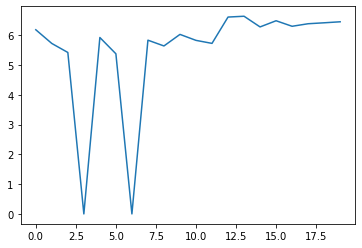

In [47]:
import matplotlib.pyplot as plt

plt.plot([list(hdata.values())[i][1][0] for i in range(len(hdata.keys())-1)])

Bash script

In [40]:
%%bash
n_cpus=6
for dirname in `ls -d data/cWza*_conformation*_[0-9][0-9][0-9][0-9] | head -2`; do 
    echo $dirname;
    rm -rf $dirname/frames;
    unzip -j $dirname/frames.zip -d $dirname/frames;
    time ls $dirname/frames/*pdb | head -20 | python run_hole_parallel.py $n_cpus $dirname;
    rm -rf $dirname/frames;
done

data/cWza_conformation0_0188
Archive:  data/cWza_conformation0_0188/frames.zip
  inflating: data/cWza_conformation0_0188/frames/frame0091.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0994.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0044.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0588.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0386.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0172.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0493.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0942.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0542.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0243.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0873.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0367.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0388.pdb  
  inflating: data/cWza_conformation0_0188/frames/frame0664.pdb  
  inflating

 ERROR s/r gseed cannot open temporary file:
 sr_gseed_tempfile - program halted
STOP ERROR in s/r gseed

real	1m8.556s
user	5m42.489s
sys	0m0.910s
 ERROR s/r gseed cannot open temporary file:
 sr_gseed_tempfile - program halted
STOP ERROR in s/r gseed
 ERROR s/r gseed cannot open temporary file:
 sr_gseed_tempfile - program halted
STOP ERROR in s/r gseed

real	1m1.154s
user	5m42.426s
sys	0m1.113s


# Conductance calulations

In [ ]:
models_paths = [
"cWza/conformation0/refined1_0001_INPUT_0231_ignorechain/",
"cWza/conformation1/refined1_0001_INPUT_0198_ignorechain/",
"cWza-K375C/conformation0/refined1_0001_INPUT_0645_ignorechain/",
"cWza-K375C/conformation1/refined1_0001_INPUT_0448_ignorechain/",
"cWza-S355C/conformation0/refined1_0001_INPUT_0273_ignorechain/",
"cWza-S355C/conformation1/refined1_0001_INPUT_0050_ignorechain/",
"cWza-Y373C/conformation1/refined1_0001_INPUT_0337_ignorechain/"
]

In [ ]:
infile = "data/md_selected_models/HOLE_conductance_data_selected_models.txt"

Gmacro_data = []
data = []
for l in open(infile, 'r').readlines():
    if "&" not in l:
        G = l.split()[7] # Gpred Rmin
        #G = l.split()[5] # Gmacro
        data.append(0.001*float(G))
    else:
        Gmacro_data.append(data)
        next
        data = []

## Figures: all mutants and conformations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(2,2,figsize=(10,6),sharex=True,sharey=True,dpi=200)

# axes per mutant
Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

# conformations per mutant
Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

# colours per conformation
Colors = {0:"blue", 1:'green'}

# Experimental conductance values
G_exp = [0.38, 0.97, 0.39, 0.98, 0.37, 0.97, 0.75]
Colors_exp = ['black','magenta','black','magenta','black','magenta','magenta']

t_initial = 0
t_final = 100
n_frames = 1001
timeline = np.linspace(t_initial,t_final,n_frames)

for i in range(len(Gmacro_data)):
    mutant, conformation, pdbname = models_paths[i].split('/')[:3]
    
    ax = Axes[mutant]
    color = Colors[int(conformation[-1])]
    dataset = np.array(Gmacro_data[i]).T
    label = models_paths[i]
    
    ax.plot(timeline,dataset,color=color,lw=0.3,alpha=0.5)
    
    label = pdbname
    ax.scatter(timeline, dataset, s=6, color='white', edgecolor=color, label=label, alpha=0.5)
    
    label = '$G_{exp} = $'+str(G_exp[i])+' (nS)'
    ax.plot((0,100), 2*[G_exp[i]], lw=1.5, linestyle='--', color=Colors_exp[i], label=label, alpha=0.85)
    
    # customise panels
    ax.legend(loc='upper right', fontsize=8)
    ax.set_title(mutant,fontsize=20)
    ax.set_xlabel("time (ns)", fontsize=12)
    ax.set_ylabel("$G_{pred}$ (nS)", fontsize=12)
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)
    ax.grid(False)

# further customise plot
suptitle = "Lowest MD $C_{\\alpha}$-RMSD models"
fig.suptitle(suptitle, fontsize=15)
fig.tight_layout()
plt.show()

## Figures: selected mutants

### cWza-S355C

Features:

* Match length of H-bond plots per mutant
* Plot data for single model 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1,1,figsize=(12,3),sharex=True,sharey=True,dpi=200)

# model identifiers
mutant = 'cWza-S355C'
conformation = '1'
pdbname = "refined1_0001_INPUT_0050_ignorechain"

# timeline
t_initial = 0
t_final = 100
n_frames = 1001
timeline = np.linspace(t_initial,t_final,n_frames)
# Gpred (HOLE predicted conductance) timeseries
dataset = np.array(Gmacro_data[5]).T

# plot scatterdata points
label = pdbname
ax.scatter(timeline, dataset, s=30, color='white', edgecolor='black', label=label, alpha=0.75)
# plot lines 
ax.plot(timeline,dataset,color='black',lw=0.3,alpha=0.5)
# plot reference lines (experimental conductance values)
G_exp = [0.37, 0.97]
colors_G_exp = ['blue','magenta']
for i in range(len(G_exp)):
    label = '$G_{exp} = $'+str(G_exp[i])+' (nS)'
    ax.plot(
        (t_initial,t_final), 
        2*[G_exp[i]], 
        lw=1.5, 
        linestyle='--', 
        color=colors_G_exp[i], 
        label=label, 
        alpha=0.85
    )

# customise panels
ax.legend(loc='lower right', fontsize=8)
ax.set_title(mutant,fontsize=20)
ax.set_xlabel("time (ns)", fontsize=17)
ax.set_ylabel("$G_{pred}$ (nS)", fontsize=17)
ax.set_xlim(0,100)
ax.set_ylim(0,1.5)
ax.grid(True)

fig.tight_layout()
plt.show()

### cWza-Y373C

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1,1,figsize=(12,3),sharex=True,sharey=True,dpi=200)

# model identifiers
mutant = 'cWza-Y373C'
conformation = '1'
pdbname = "refined1_0001_INPUT_0337_ignorechain"

# timeline
t_initial = 0
t_final = 100
n_frames = 1001
timeline = np.linspace(t_initial,t_final,n_frames)
# Gpred (HOLE predicted conductance) timeseries
dataset = np.array(Gmacro_data[6]).T

# plot scatterdata points
label = pdbname
ax.scatter(timeline, dataset, s=30, color='white', edgecolor='black', label=label, alpha=0.75)
# plot lines 
ax.plot(timeline,dataset,color='black',lw=0.3,alpha=0.5)
# plot reference lines (experimental conductance values)
G_exp = [0.75]
colors_G_exp = ['magenta']
for i in range(len(G_exp)):
    label = '$G_{exp} = $'+str(G_exp[i])+' (nS)'
    ax.plot(
        (t_initial,t_final), 
        2*[G_exp[i]], 
        lw=1.5, 
        linestyle='--', 
        color=colors_G_exp[i], 
        label=label, 
        alpha=0.85
    )

# customise panels
ax.legend(loc='lower right', fontsize=8)
ax.set_title(mutant,fontsize=20)
ax.set_xlabel("time (ns)", fontsize=17)
ax.set_ylabel("$G_{pred}$ (nS)", fontsize=17)
ax.set_xlim(0,100)
ax.set_ylim(0,1.5)
ax.grid(True)

fig.tight_layout()
plt.show()

HISTORGRAM

In [ ]:
df = pd.DataFrame(columns=['G','model'])
for i in range(len(Gmacro_data)):
    dataset = np.array(Gmacro_data[i]).T
    df_per_model = pd.DataFrame(np.column_stack([dataset,np.tile([i],len(dataset))]), columns=['G','model'])
    df = df.append(df_per_model, ignore_index=True)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,5),dpi=200)

histograms = sns.histplot(
    data=df[df.G < 3],
    x='G',
    hue='model',
    stat='density',
    kde=True,
    palette='Set2',
    element="poly",
    legend=False,
    alpha=0.45,
    ax=ax
)

labels = models_paths
labels.reverse()

histograms.legend(fontsize=5,facecolor='white',labels=labels)

ax.set_title("Lowest MD $C_{\\alpha}$-RMSD models")
ax.set_xlabel("$G_{pred}$ (nS)", fontsize=15)
ax.set_ylabel('probability density', fontsize=15)

ax.set_xlim(0,3)
ax.set_ylim(0,0.75)
ylims = ax.get_ylim()

# H-state cWza model (crystal structure)
Gpred_cWza_Hstate = [1.2]
ax.plot(2*Gpred_cWza_Hstate,ylims,lw=1.5,linestyle='--',color='violet',alpha=1,zorder=10)
ax.text(1.26,0.4,'H-state (NChem 2017)',rotation=90,fontsize=5,
        bbox=dict(facecolor='white',edgecolor='violet',alpha=0.5, boxstyle='round, pad=0.5'))

#L-state cWza model (CCBuilder and BUDE optimised)
Gpred_cWza_Lstate = [0.4]
ax.plot(2*Gpred_cWza_Lstate,ylims,lw=1.5,linestyle='--',color='red',alpha=1,zorder=10)
plt.text(0.45,0.4,'L-state (NChem 2017)',rotation=90,fontsize=5,
        bbox=dict(facecolor='white',edgecolor='red',alpha=0.5,boxstyle='round, pad=0.5'))

ax.grid(True)
plt.show()

Code lines for protein frame extraction and HOLE execution

* List of relative paths in `paths_list_protein_extraction.txt` to directories containing `.xtc` MD trajectory files

```bash
cWza/conformation0/refined1_0001_INPUT_0231_ignorechain/
cWza/conformation1/refined1_0001_INPUT_0198_ignorechain/
cWza-K375C/conformation0/refined1_0001_INPUT_0645_ignorechain/
cWza-K375C/conformation1/refined1_0001_INPUT_0448_ignorechain/
cWza-S355C/conformation0/refined1_0001_INPUT_0273_ignorechain/
cWza-S355C/conformation1/refined1_0001_INPUT_0050_ignorechain/
cWza-Y373C/conformation1/refined1_0001_INPUT_0337_ignorechain/
```

* `bash` commands for using frame extraction Python script to store PDB frames in folder `md_100ns`


```bash
for path in `cat paths_list_protein_extraction.txt`; do 
    python ~/mpmodeling/tools/protein_frame_extractor.py md_100ns $path; 
done
```

* Inside the directory storing the PDB frames `run_hole` for every PDB file with prefix `Protein`

```bash
(for n in `seq 900 1000`; do run_hole Protein_${n}.pdb ; done) &
```

In [ ]:
%%writefile add_chain_numbers.py
from pymol import cmd
import sys

pdb_in = sys.argv[1] # Input PDB path
pdb_out = sys.argv[2] # Output PDB path

cmd.load(pdb_in,"MyProtein")
N_atoms = cmd.count_atoms("MyProtein")

Chains = ['A', 'B','C','D','E','F','G','H']

atoms_per_chain = N_atoms/len(Chains)

for k in range(len(Chains)):
    atom_number_intial = int( 1 + k*atoms_per_chain )
    atom_number_final  = int( (k + 1)*atoms_per_chain )
    selection = "id "+ str(atom_number_intial) + ":" + str(atom_number_final)
    expression = "chain='"+Chains[k]+"'"
    cmd.alter(selection, expression)

cmd.set("retain_order",1)
cmd.save(pdb_out ,"MyProtein")
